<a href="https://colab.research.google.com/github/G4t011/Challenge_TelecomX/blob/main/CHALLENGE_TelcomX_LATAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
telcom = pd.read_json('/content/drive/MyDrive/ONE/CHALLENGE TelcomX/TelecomX_Data.json')

In [ ]:
telcom.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [ ]:
telcom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [ ]:
columnas = list(telcom.columns)
columnas

['customerID', 'Churn', 'customer', 'phone', 'internet', 'account']

In [ ]:
customer = telcom['customer'].apply(pd.Series)
phone= telcom['phone'].apply(pd.Series)
internet= telcom['internet'].apply(pd.Series)

In [ ]:
account_raw = telcom['account'].apply(pd.Series)
charges_df = account_raw['Charges'].apply(pd.Series)
account_df = account_raw.drop(columns=['Charges']).join(charges_df)

In [ ]:
account_raw

,Contract,PaperlessBilling,PaymentMethod,Charges
0,One year,Yes,Mailed check,"{'Monthly': 65.6, 'Total': '593.3'}"
1,Month-to-month,No,Mailed check,"{'Monthly': 59.9, 'Total': '542.4'}"
2,Month-to-month,Yes,Electronic check,"{'Monthly': 73.9, 'Total': '280.85'}"
3,Month-to-month,Yes,Electronic check,"{'Monthly': 98.0, 'Total': '1237.85'}"
4,Month-to-month,Yes,Mailed check,"{'Monthly': 83.9, 'Total': '267.4'}"
...,...,...,...,...
7262,One year,No,Mailed check,"{'Monthly': 55.15, 'Total': '742.9'}"
7263,Month-to-month,Yes,Electronic check,"{'Monthly': 85.1, 'Total': '1873.7'}"
7264,Month-to-month,Yes,Mailed check,"{'Monthly': 50.3, 'Total': '92.75'}"
7265,Two year,No,Mailed check,"{'Monthly': 67.85, 'Total': '4627.65'}"


In [ ]:
account_df

,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,One year,Yes,Mailed check,65.60,593.3
1,Month-to-month,No,Mailed check,59.90,542.4
2,Month-to-month,Yes,Electronic check,73.90,280.85
3,Month-to-month,Yes,Electronic check,98.00,1237.85
4,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...
7262,One year,No,Mailed check,55.15,742.9
7263,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,Month-to-month,Yes,Mailed check,50.30,92.75
7265,Two year,No,Mailed check,67.85,4627.65


In [ ]:
telcom_final = pd.concat([
    telcom[['customerID', 'Churn']],  # columnas originales
    customer,
    phone,
    internet,
    account_df
], axis=1)

In [ ]:
telcom_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [ ]:
telcom_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


###COMPROBACIÓN DE INCOHERENCIAS EN LOS DATOS

A continuación se procede a rellenar los valores de las filas donde la casilla churn no tiene valor, bajo la logica siguiente:

Se busca las filas donde el valor de churn sea nulo y se analizan la divison de la casilla total / Monthly, si el resultado es mayor a el valor de la casilla "tenure" entonces la casilla churn se le da valor de 0, si el resultado es menor o igual entonces se le da un valor de uno, significado de que canceló el contrato.

In [ ]:
telcom_final = telcom_final[telcom_final['tenure'] != 0]

In [ ]:
telcom_final['Total'] = telcom_final['Total'].astype(np.float64)


In [ ]:
filas_vacias = telcom_final[telcom_final['Churn'] == ""]
filas_vacias

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.30
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.10
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.20
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.20
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.90


In [ ]:
# Filtrar filas donde Churn == ""
filtro = telcom_final['Churn'] == ""

# Calcular la condición para asignar 0 o 1
division = telcom_final['Total'] / telcom_final['Monthly']

# Asignar 0 donde la división > tenure
telcom_final.loc[filtro & (division > telcom_final['tenure']), 'Churn'] = 0

# Asignar 1 donde la división <= tenure
telcom_final.loc[filtro & (division <= telcom_final['tenure']), 'Churn'] = 1

In [ ]:
telcom_final.head(20)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40
5,0013-MHZWF,No,Female,0,No,Yes,9,Yes,No,DSL,...,No,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),69.40,571.45
6,0013-SMEOE,No,Female,1,Yes,No,71,Yes,No,Fiber optic,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),109.70,7904.25
7,0014-BMAQU,No,Male,0,Yes,No,63,Yes,Yes,Fiber optic,...,No,No,Yes,No,No,Two year,Yes,Credit card (automatic),84.65,5377.80
8,0015-UOCOJ,No,Female,1,No,No,7,Yes,No,DSL,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,48.20,340.35
9,0016-QLJIS,No,Female,0,Yes,Yes,65,Yes,Yes,DSL,...,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Mailed check,90.45,5957.90


##PREPARACIÓN DE DATOS
['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines']

Seran cambiadas de datos a numericos para poder usarlas en el analisis cambiando yes por 1 y no por 0

In [ ]:
# Lista de columnas a modificar
cols_binarias = ['Churn', 'Partner', 'Dependents', 'PhoneService']

# Reemplazo de valores
telcom_final[cols_binarias] = telcom_final[cols_binarias].replace({'Yes': 1, 'No': 0})
telcom_final[cols_binarias] = telcom_final[cols_binarias].astype(int)
telcom_final.head()

/tmp/ipython-input-19-2052557898.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telcom_final[cols_binarias] = telcom_final[cols_binarias].replace({'Yes': 1, 'No': 0})


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Monthly,Total
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [ ]:
telcom_final = telcom_final.drop(columns=['customerID', 'PaperlessBilling'])#, 'MultipleLines'

In [ ]:
#Se crea la nueva columna "Cuentas_Diarias", la cual es el resultado de dividir la columna "Monthly" entre 30 para sacar el valor diario del servicio
telcom_final['Cuentas_Diarias'] = (telcom_final['Monthly'] / 30).round(2).astype(np.float64)

In [ ]:
telcom_final

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaymentMethod,Monthly,Total,Cuentas_Diarias
0,0,Female,0,1,1,9,1,No,DSL,No,Yes,No,Yes,Yes,No,One year,Mailed check,65.60,593.30,2.19
1,0,Male,0,0,0,9,1,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,Mailed check,59.90,542.40,2.00
2,1,Male,0,0,0,4,1,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Electronic check,73.90,280.85,2.46
3,1,Male,1,1,0,13,1,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Electronic check,98.00,1237.85,3.27
4,1,Female,1,1,0,3,1,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,0,Female,0,0,0,13,1,No,DSL,Yes,No,No,Yes,No,No,One year,Mailed check,55.15,742.90,1.84
7263,1,Male,0,1,0,22,1,Yes,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Electronic check,85.10,1873.70,2.84
7264,0,Male,0,0,0,2,1,No,DSL,No,Yes,No,No,No,No,Month-to-month,Mailed check,50.30,92.75,1.68
7265,0,Male,0,1,1,67,1,No,DSL,Yes,No,Yes,Yes,No,Yes,Two year,Mailed check,67.85,4627.65,2.26


ANALISIS DESCRIPTIVO DE LA TABLA DE DATOS

Se seleccionaron solamente las columnas Churn, tenure, Monthly, Total y Cuantas diarias, ya que estas cuentan con info como el total de usuarios, el maximo y minimo de meses de los contratos de los usuarios, el costo mensual, los totales y cuentas diarias, con sus diferentes valores


In [ ]:
select_cols = telcom_final[['Churn', 'tenure', 'Monthly', 'Total', 'Cuentas_Diarias']]
select_cols.describe()

,Churn,tenure,Monthly,Total,Cuentas_Diarias
count,7256.000000,7256.000000,7256.000000,7256.000000,7256.000000
mean,0.274531,32.395535,64.755423,2280.634213,2.158467
std,0.446309,24.558067,30.125739,2268.632997,1.004282
min,0.000000,1.000000,18.250000,18.800000,0.610000
25%,0.000000,9.000000,35.450000,400.225000,1.180000
50%,0.000000,29.000000,70.300000,1391.000000,2.340000
75%,1.000000,55.000000,89.900000,3785.300000,3.000000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


##DISTRIBUCIÓN DE EVASION

#####ANALISIS DE CANTIDAD DE USUARIOS QUE SE DIERON DE BAJA DEL SERVICIO TELCOM

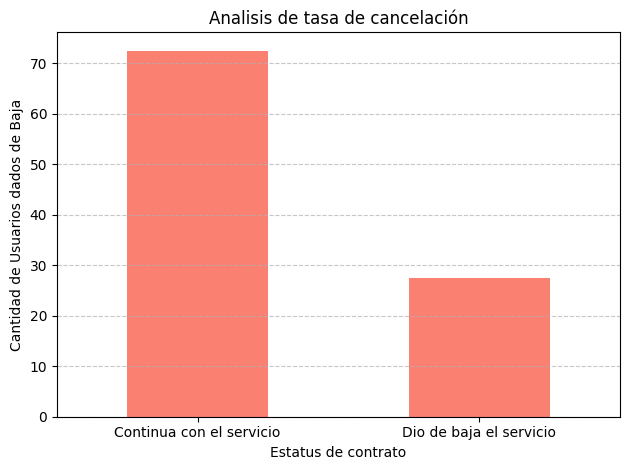

In [ ]:
percent_churn = telcom_final['Churn'].value_counts(normalize=True) * 100
percent_churn

tipo = {
    0 : 'Continua con el servicio',
    1 : 'Dio de baja el servicio'
}

percent_churn = percent_churn.rename(index = tipo)

percent_churn.plot(kind='bar', color = 'salmon')
plt.title('Analisis de tasa de cancelación')
plt.xlabel('Estatus de contrato')
plt.ylabel('Cantidad de Usuarios dados de Baja')
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

In [ ]:
percent_churn

,proportion
Churn,
Continua con el servicio,72.546858
Dio de baja el servicio,27.453142


ANALISIS DE CHURN POR TIPO DE SERVICIO DE INTERNET y SI ES QUE CUENTA CON LINEA TELEFÓNICA


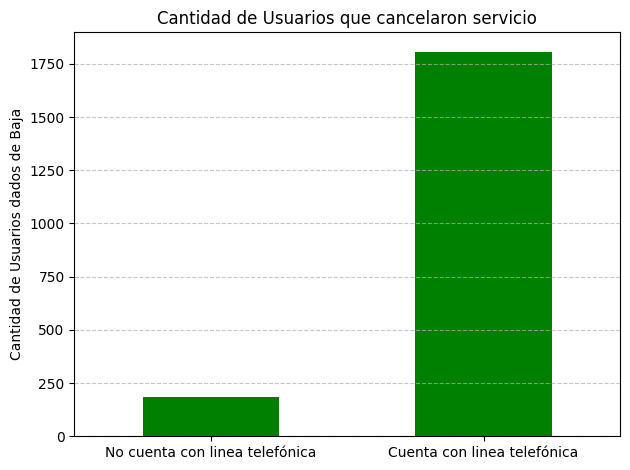

In [ ]:
#Analisis Churn partiendo de servicio telefonico solamente
churn_por_tel = telcom_final[telcom_final['Churn'] == 1].groupby('PhoneService').size()

nombres_change = {
    0: 'No cuenta con linea telefónica',
    1: 'Cuenta con linea telefónica'
}

churn_por_tel = churn_por_tel.rename(index = nombres_change)

churn_por_tel.plot(kind='bar', color = 'green')
plt.title('Cantidad de Usuarios que cancelaron servicio')
plt.xlabel('')
plt.ylabel('Cantidad de Usuarios dados de Baja')
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

In [ ]:
#Analisis churn partiendo de servicio de internet
churn_por_internet = telcom_final[telcom_final['Churn'] == 1].groupby('InternetService').size()
#churn_por_internet

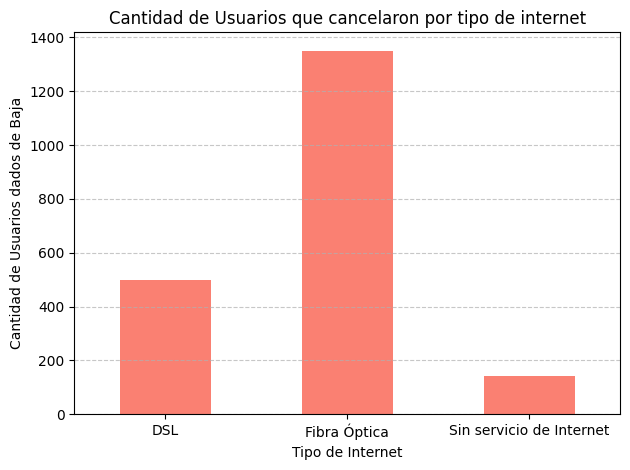

In [ ]:
nombres_change = {
    'DSL': 'DSL',
    'Fiber optic': 'Fibra Óptica',
    'No': 'Sin servicio de Internet'
}

churn_por_internet = churn_por_internet.rename(index = nombres_change)

churn_por_internet.plot(kind='bar', color = 'salmon')
plt.title('Cantidad de Usuarios que cancelaron por tipo de internet')
plt.xlabel('Tipo de Internet')
plt.ylabel('Cantidad de Usuarios dados de Baja')
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

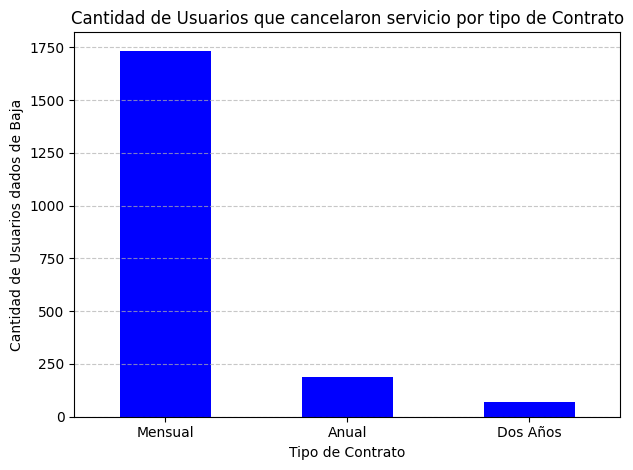

In [ ]:
#Analisis Churn partiendo del tipo de contrato
churn_por_contract = telcom_final[telcom_final['Churn'] == 1].groupby('Contract').size()

nombres_change = {
    'Month-to-month': 'Mensual',
    'One year': 'Anual',
    'Two year': 'Dos Años'
}

churn_por_contract = churn_por_contract.rename(index = nombres_change)


churn_por_contract.plot(kind='bar', color = 'blue')
plt.title('Cantidad de Usuarios que cancelaron servicio por tipo de Contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Cantidad de Usuarios dados de Baja')
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

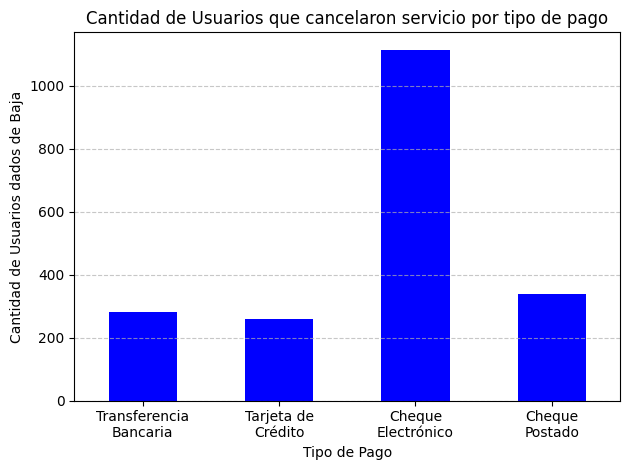

In [ ]:
#Analisis Churn partiendo del tipo de metodo de pago
churn_por_contract = telcom_final[telcom_final['Churn'] == 1].groupby('PaymentMethod').size()

nombres_change = {
    'Electronic check': 'Cheque\nElectrónico',
    'Mailed check': 'Cheque\nPostado',
    'Bank transfer (automatic)': 'Transferencia\nBancaria',
    'Credit card (automatic)': 'Tarjeta de\nCrédito'
}

churn_por_contract = churn_por_contract.rename(index = nombres_change)


churn_por_contract.plot(kind='bar', color = 'blue')
plt.title('Cantidad de Usuarios que cancelaron servicio por tipo de pago')
plt.xlabel('Tipo de Pago')
plt.ylabel('Cantidad de Usuarios dados de Baja')
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

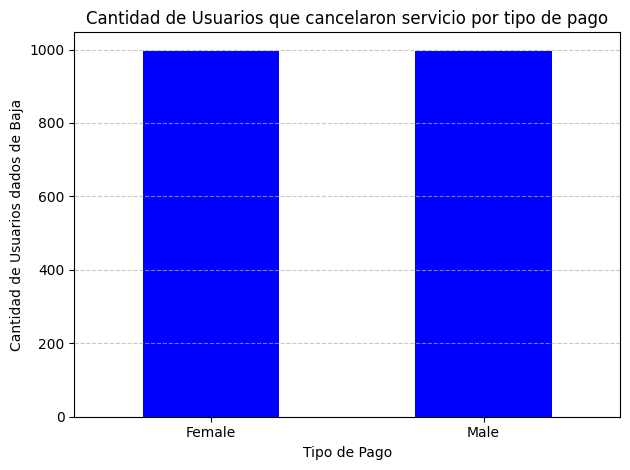

In [ ]:
#Analisis Churn partiendo del genero del usuario
churn_por_agend = telcom_final[telcom_final['Churn'] == 1].groupby('gender').size()

"""
nombres_change = {
    'Electronic check': 'Cheque\nElectrónico',
    'Mailed check': 'Cheque\nPostado',
    'Bank transfer (automatic)': 'Transferencia\nBancaria',
    'Credit card (automatic)': 'Tarjeta de\nCrédito'
}

churn_por_agend = churn_por_agend.rename(index = nombres_change)
"""

churn_por_agend.plot(kind='bar', color = 'blue')
plt.title('Cantidad de Usuarios que cancelaron servicio por tipo de pago')
plt.xlabel('Tipo de Pago')
plt.ylabel('Cantidad de Usuarios dados de Baja')
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

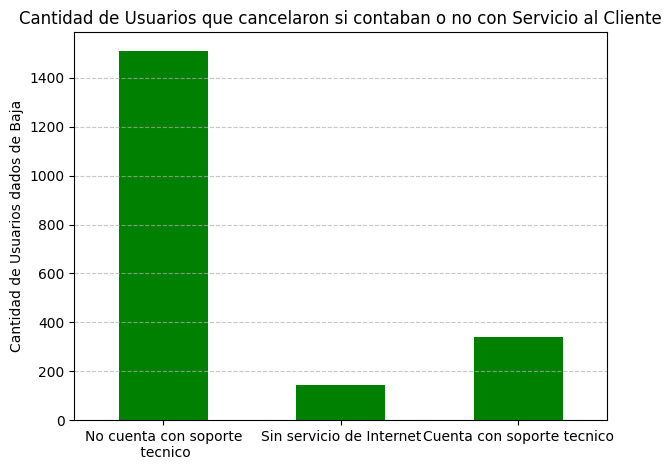

In [ ]:
#Analisis Churn comparando con quien tiene y no tiene Soporte Tecnico
churn_support = telcom_final[telcom_final['Churn'] == 1].groupby('TechSupport').size()
churn_support


nombres_change = {
    'No': 'No cuenta con soporte\n tecnico',
    'No internet service': 'Sin servicio de Internet',
    'Yes': 'Cuenta con soporte tecnico'
}

churn_support = churn_support.rename(index = nombres_change)


churn_support.plot(kind='bar', color = 'green')
plt.title('Cantidad de Usuarios que cancelaron si contaban o no con Servicio al Cliente')
plt.xlabel('')
plt.ylabel('Cantidad de Usuarios dados de Baja')
plt.xticks(rotation = 0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()


In [ ]:
#ANALIZANDO 3 COLUMNAS A LA VEZ: "SENIORCITIZEN, "PARTNER" Y "DEPENDANTS" esto para saber varias combinaciones que podrían estar afectando la cancelación

churn_df = telcom_final[telcom_final['Churn'] == 1]

group_churn  = churn_df.groupby(['SeniorCitizen', 'Partner', 'Dependents']).size().reset_index(name='Cancelaciones')
group_churn

,SeniorCitizen,Partner,Dependents,Cancelaciones
0,0,0,0,896
1,0,0,1,82
2,0,1,0,262
3,0,1,1,256
4,1,0,0,283
5,1,0,1,2
6,1,1,0,190
7,1,1,1,21


In [ ]:
map_senior = { 0: 'Empleado', 1: 'Jubilado'}
map_partner = { 0: 'Soltero', 1: 'Con Pareja'}
map_dependents = { 0 : 'Sin Hijos', 1 : 'Con hijos'}

group_churn['Profile'] = group_churn.apply(lambda row: f"{map_senior[row['SeniorCitizen']]} \n {map_partner[row['Partner']]} \n {map_dependents[row['Dependents']]}", axis=1)

group_churn

,SeniorCitizen,Partner,Dependents,Cancelaciones,Profile
0,0,0,0,896,Empleado \n Soltero \n Sin Hijos
1,0,0,1,82,Empleado \n Soltero \n Con hijos
2,0,1,0,262,Empleado \n Con Pareja \n Sin Hijos
3,0,1,1,256,Empleado \n Con Pareja \n Con hijos
4,1,0,0,283,Jubilado \n Soltero \n Sin Hijos
5,1,0,1,2,Jubilado \n Soltero \n Con hijos
6,1,1,0,190,Jubilado \n Con Pareja \n Sin Hijos
7,1,1,1,21,Jubilado \n Con Pareja \n Con hijos


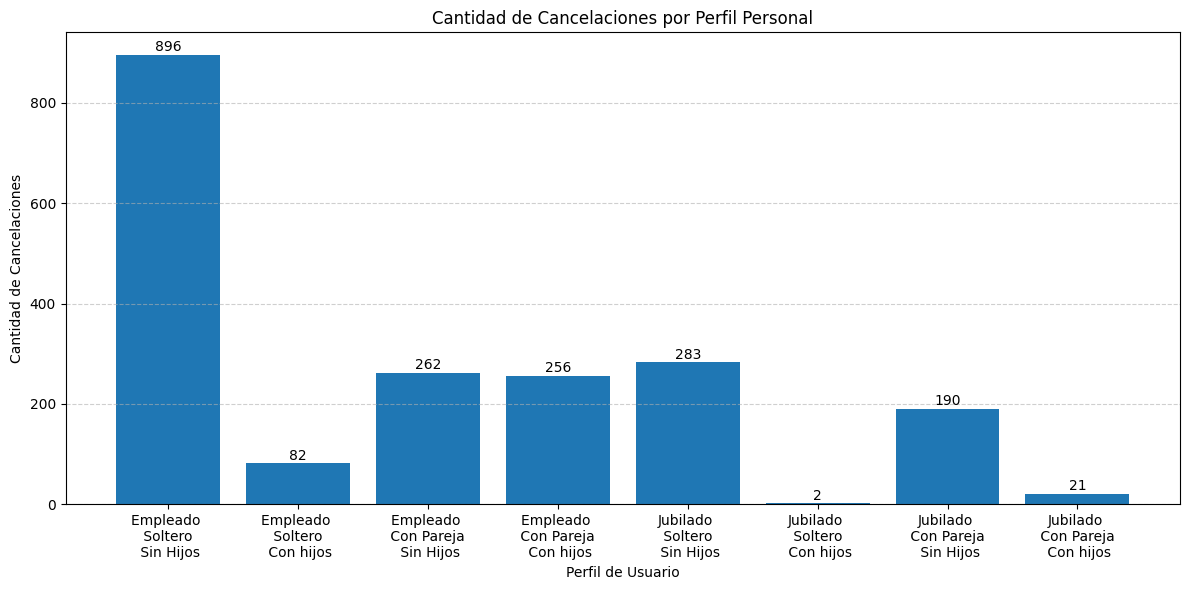

In [ ]:
plt.figure(figsize=(12, 6))
bars = plt.bar(group_churn['Profile'], group_churn['Cancelaciones'])
plt.title('Cantidad de Cancelaciones por Perfil Personal')
plt.xlabel('Perfil de Usuario')
plt.ylabel('Cantidad de Cancelaciones')
#plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height}', ha='center', va='bottom', fontsize = 10, color = 'black')

plt.show()


ANALISIS DE 3 VARIABLES LINEA TELEFONICA, INTERNET y SOPORTE TECNICO

In [ ]:
churn_df = telcom_final[telcom_final['Churn'] == 1]

group_churn  = churn_df.groupby(['PhoneService', 'InternetService', 'TechSupport']).size().reset_index(name='Cancelaciones')
group_churn

,PhoneService,InternetService,TechSupport,Cancelaciones
0,0,DSL,No,152
1,0,DSL,Yes,32
2,1,DSL,No,217
3,1,DSL,Yes,98
4,1,Fiber optic,No,1142
5,1,Fiber optic,Yes,209
6,1,No,No internet service,142


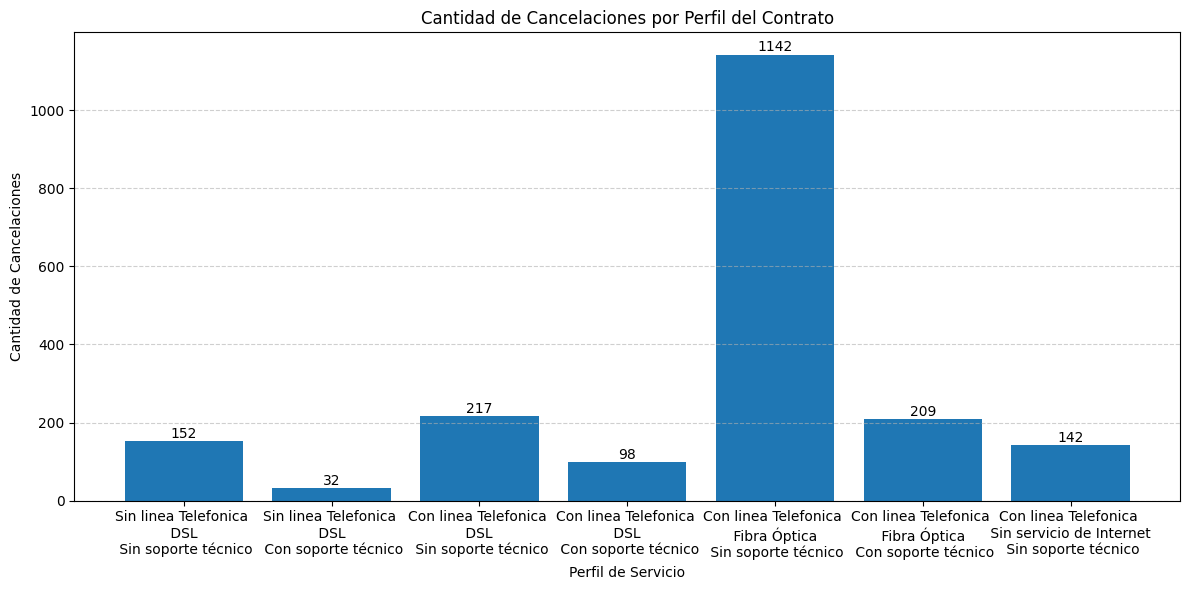

In [ ]:
map_phone = { 0: 'Sin linea Telefonica', 1: 'Con linea Telefonica'}
map_Internet = { 'DSL': 'DSL', 'Fiber optic': 'Fibra Óptica', 'No': 'Sin servicio de Internet'}
map_Support = { 'No': 'Sin soporte técnico', 'Yes': 'Con soporte técnico', 'No internet service': 'Sin soporte técnico' }

group_churn['Profile'] = group_churn.apply(lambda row: f"{map_phone[row['PhoneService']]} \n {map_Internet[row['InternetService']]} \n {map_Support[row['TechSupport']]}", axis=1)

group_churn

plt.figure(figsize=(12, 6))
bars = plt.bar(group_churn['Profile'], group_churn['Cancelaciones'])
plt.title('Cantidad de Cancelaciones por Perfil del Contrato')
plt.xlabel('Perfil de Servicio')
plt.ylabel('Cantidad de Cancelaciones')
#plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height}', ha='center', va='bottom', fontsize = 10, color = 'black')

plt.show()

ANALISIS DE 2 VARIABLES RELACIONADAS TIPO DE CONTRATO y METODO DE PAGO


In [ ]:
churn_df = telcom_final[telcom_final['Churn'] == 1]

group_churn  = churn_df.groupby(['Contract', 'PaymentMethod']).size().reset_index(name='Cancelaciones')
group_churn

,Contract,PaymentMethod,Cancelaciones
0,Month-to-month,Bank transfer (automatic),211
1,Month-to-month,Credit card (automatic),188
2,Month-to-month,Electronic check,1030
3,Month-to-month,Mailed check,305
4,One year,Bank transfer (automatic),44
5,One year,Credit card (automatic),48
6,One year,Electronic check,70
7,One year,Mailed check,25
8,Two year,Bank transfer (automatic),26
9,Two year,Credit card (automatic),23


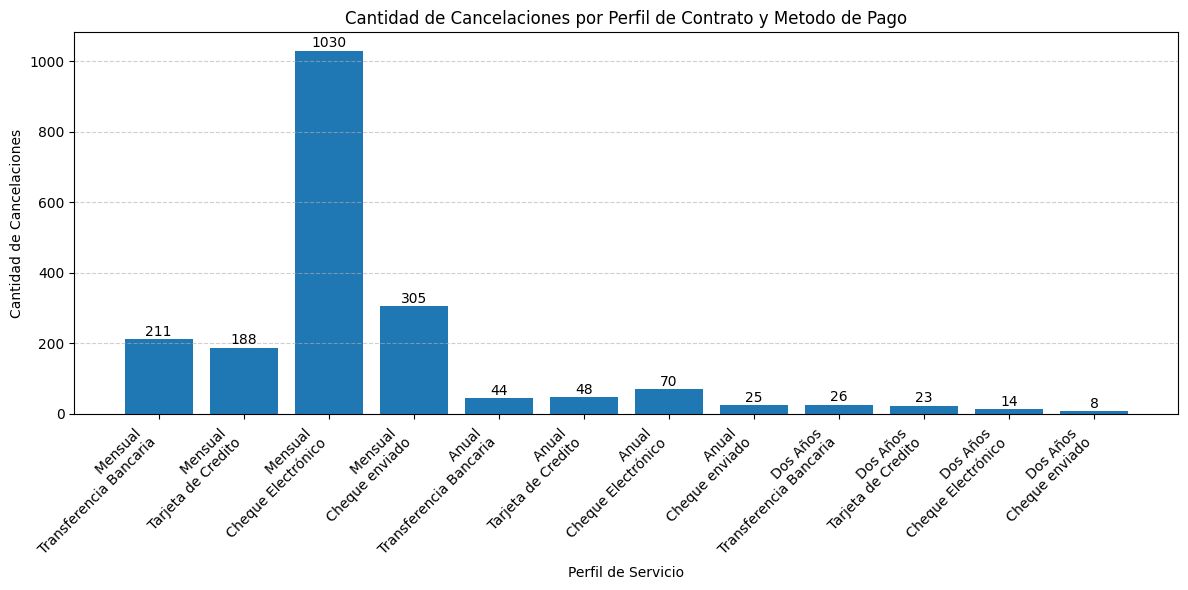

In [ ]:
map_contract = { 'Month-to-month': 'Mensual', 'One year': 'Anual', 'Two year': 'Dos Años'}
map_method = { 'Bank transfer (automatic)': 'Transferencia Bancaria', 'Credit card (automatic)': 'Tarjeta de Credito', 'Electronic check': 'Cheque Electrónico', 'Mailed check': 'Cheque enviado' }

group_churn['Profile'] = group_churn.apply(lambda row: f"{map_contract[row['Contract']]} \n {map_method[row['PaymentMethod']]}", axis=1)


group_churn

plt.figure(figsize=(12, 6))
bars = plt.bar(group_churn['Profile'], group_churn['Cancelaciones'])
plt.title('Cantidad de Cancelaciones por Perfil de Contrato y Metodo de Pago')
plt.xlabel('Perfil de Servicio')
plt.ylabel('Cantidad de Cancelaciones')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

for bar in bars:
  height = bar.get_height()
  plt.text(bar.get_x() + bar.get_width() / 2, height + 1, f'{height}', ha='center', va='bottom', fontsize = 10, color = 'black')

plt.show()

#Conteo de evasión por variables numéricas

Analisis churn usando la cantidad de meses 0, 12, 24, 36, 48, 60, 72 así como el de cantidad total de pago 0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, max

/tmp/ipython-input-36-4171473368.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelacion = telcom_final[telcom_final['Churn'] == 1].groupby('meses_bin').size()


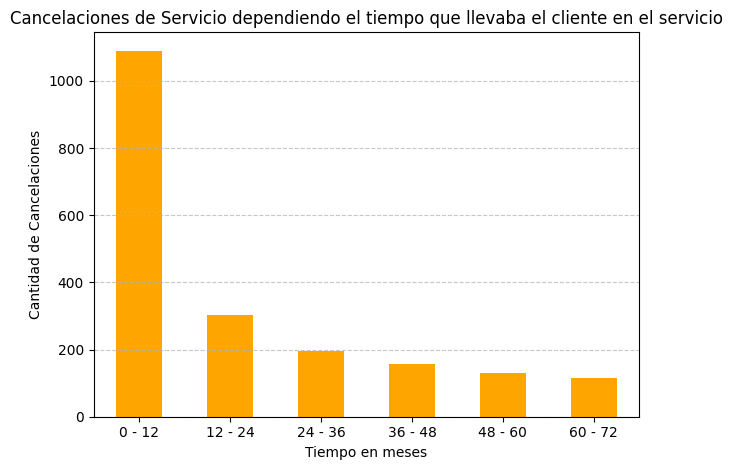

In [ ]:
# analizando por años
bins_meses = [0, 12, 24, 36, 48, 60, 72]

labels_meses = ['0 - 12', '12 - 24', '24 - 36', '36 - 48', '48 - 60', '60 - 72']

telcom_final['meses_bin'] = pd.cut(telcom_final['tenure'], bins=bins_meses, labels=labels_meses, right= True)
#onteo de clientes que cancelaron por cada grupo
cancelacion = telcom_final[telcom_final['Churn'] == 1].groupby('meses_bin').size()

#Graficado
cancelacion.plot(kind = 'bar', color = 'orange')
plt.title('Cancelaciones de Servicio dependiendo el tiempo que llevaba el cliente en el servicio')
plt.xlabel('Tiempo en meses')
plt.ylabel('Cantidad de Cancelaciones')
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

/tmp/ipython-input-37-2403394296.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelacion2 = telcom_final[telcom_final['Churn'] == 1].groupby('total_bin').size()


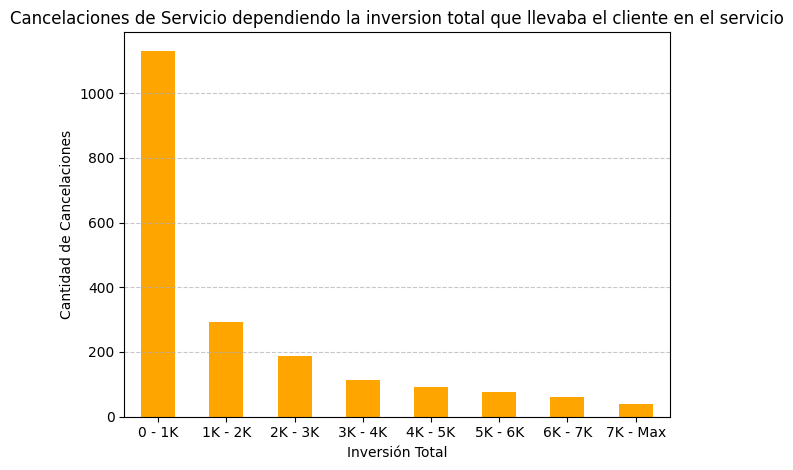

In [ ]:
# analizando por total pagado
bins_total = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, telcom_final['Total'].max()]

labels_total = ['0 - 1K', '1K - 2K', '2K - 3K', '3K - 4K', '4K - 5K', '5K - 6K', '6K - 7K', '7K - Max']

telcom_final['total_bin'] = pd.cut(telcom_final['Total'], bins=bins_total, labels=labels_total, right= True)
#onteo de clientes que cancelaron por cada grupo
cancelacion2 = telcom_final[telcom_final['Churn'] == 1].groupby('total_bin').size()

#Graficado
cancelacion2.plot(kind = 'bar', color = 'orange')
plt.title('Cancelaciones de Servicio dependiendo la inversion total que llevaba el cliente en el servicio')
plt.xlabel('Inversión Total')
plt.ylabel('Cantidad de Cancelaciones')
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()

In [ ]:
telcom_final['Cuentas_Diarias'].describe()

,Cuentas_Diarias
count,7256.000000
mean,2.158467
std,1.004282
min,0.610000
25%,1.180000
50%,2.340000
75%,3.000000
max,3.960000


¡Extra! Análisis de correlación entre variables

/tmp/ipython-input-39-3598961088.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancelacion = telcom_final[telcom_final['Churn'] == 1].groupby('daily_bin').size()


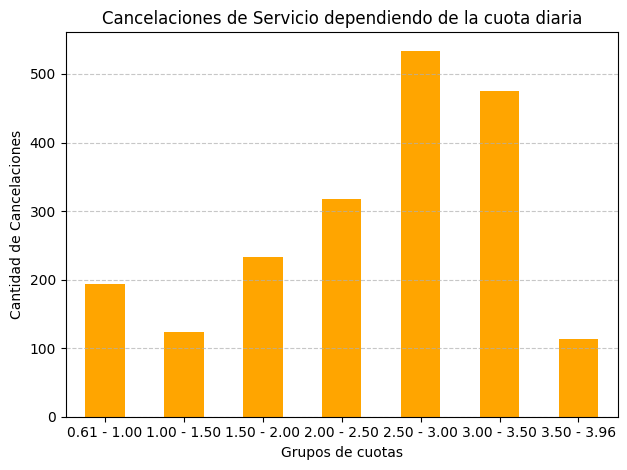

In [ ]:
# analizando relacion entre la cuenta diaria y el churn
bins_daily = [0.61, 1.00, 1.50, 2.00, 2.50, 3.00, 3.50, telcom_final['Cuentas_Diarias'].max()]

labels_daily = ['0.61 - 1.00', '1.00 - 1.50', '1.50 - 2.00', '2.00 - 2.50', '2.50 - 3.00', '3.00 - 3.50', '3.50 - 3.96']

telcom_final['daily_bin'] = pd.cut(telcom_final['Cuentas_Diarias'], bins=bins_daily, labels=labels_daily, right= True)
#onteo de clientes que cancelaron por cada grupo de cuotas diarias
cancelacion = telcom_final[telcom_final['Churn'] == 1].groupby('daily_bin').size()

#Graficado
cancelacion.plot(kind = 'bar', color = 'orange')
plt.title('Cancelaciones de Servicio dependiendo de la cuota diaria')
plt.xlabel('Grupos de cuotas')
plt.ylabel('Cantidad de Cancelaciones')
plt.xticks(rotation=0)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.tight_layout()
plt.show()


#Cómo la cantidad de servicios contratados afecta la probabilidad de churn.


In [ ]:
# En este haremos un analisis de dependiendo de la cantidad de servicios cual es la tasa de churn
#Paso uno definir las columnas con info de servicios.
telcom_final2 = telcom_final.copy()
servicios = [
    'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies'
]

#Remplazamos información dentro de estas columnas para trabajar bien
telcom_final2[servicios] = telcom_final[servicios].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0, 'DSL': 1, 'Fiber optic': 1})

#Creamos una cantidad con la cantidad de servicios contratados, sin importar el precio simplemente cuantos servicios:
telcom_final['TotalServicios'] = telcom_final2[servicios].sum(axis=1)

#Empieza el analisis de churn:
# Calcular cantidad de clientes que cancelaron según número de servicios
churn_por_servicios = telcom_final[telcom_final['Churn'] == 1].groupby('TotalServicios').size()

# Calcular total de clientes por número de servicios
total_por_servicios = telcom_final.groupby('TotalServicios').size()

# Calcular porcentaje de churn
tasa_churn_servicios = (churn_por_servicios / total_por_servicios) * 100

# Combinar en un DataFrame para mostrar mejor
telcom_final_churn_servicios = pd.DataFrame({
    'Cancelaciones': churn_por_servicios,
    'Total clientes': total_por_servicios,
    'Tasa de Churn (%)': tasa_churn_servicios
}).fillna(0).astype({'Cancelaciones': int, 'Total clientes': int})

telcom_final_churn_servicios



/tmp/ipython-input-40-1929846802.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  telcom_final2[servicios] = telcom_final[servicios].replace({'Yes': 1, 'No': 0, 'No phone service': 0, 'No internet service': 0, 'DSL': 1, 'Fiber optic': 1})


,Cancelaciones,Total clientes,Tasa de Churn (%)
TotalServicios,,,
1,164,1302,12.596006
2,284,894,31.767338
3,396,871,45.464983
4,368,994,37.022133
5,307,949,32.349842
6,243,927,26.213592
7,161,697,23.098996
8,55,408,13.480392
9,14,214,6.542056


CORRELACION DE VARIABLES PARA SU ANALISIS

In [ ]:
correlacion = telcom_final.corr(numeric_only= True)

correlacion_churn = correlacion['Churn'].sort_values(ascending=False)

correlacion

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Monthly,Total,Cuentas_Diarias,TotalServicios
Churn,1.000000,0.143424,-0.144807,-0.158326,-0.345177,0.009952,0.181819,-0.197283,0.181880,-0.023101
SeniorCitizen,0.143424,1.000000,0.023439,-0.212338,0.017333,0.009885,0.220098,0.103499,0.220070,0.119076
Partner,-0.144807,0.023439,1.000000,0.448500,0.379684,0.019496,0.098064,0.316918,0.098120,0.194140
Dependents,-0.158326,-0.212338,0.448500,1.000000,0.163444,-0.003212,-0.114345,0.063960,-0.114394,-0.006290
tenure,-0.345177,0.017333,0.379684,0.163444,1.000000,0.009661,0.246981,0.825118,0.246993,0.474168
PhoneService,0.009952,0.009885,0.019496,-0.003212,0.009661,1.000000,0.247323,0.113791,0.247281,0.082308
Monthly,0.181819,0.220098,0.098064,-0.114345,0.246981,0.247323,1.000000,0.652109,0.999996,0.851845
Total,-0.197283,0.103499,0.316918,0.063960,0.825118,0.113791,0.652109,1.000000,0.652123,0.778440
Cuentas_Diarias,0.181880,0.220070,0.098120,-0.114394,0.246993,0.247281,0.999996,0.652123,1.000000,0.851826
TotalServicios,-0.023101,0.119076,0.194140,-0.006290,0.474168,0.082308,0.851845,0.778440,0.851826,1.000000


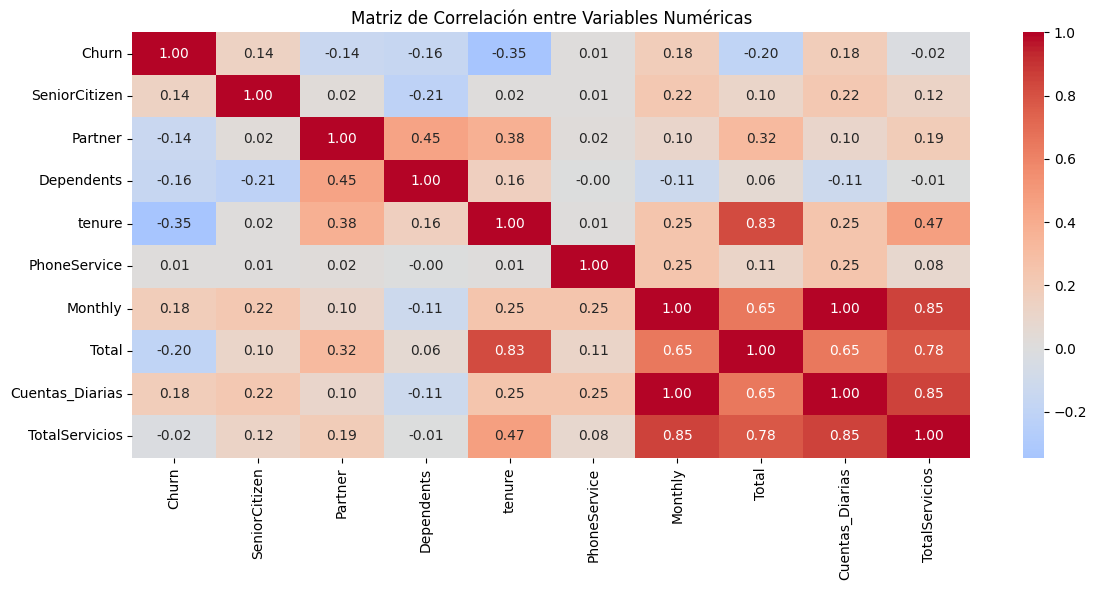

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", center = 0)
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.tight_layout()
plt.show()

#INFORME FINAL

##<font color = "orange">🔹 Introducción: Explica el objetivo del análisis y el problema de evasión de clientes (Churn).</font>
Como su nombre lo dice, se requiere hacer el analisis de churn o tasa de abandono de clientes, el objetivo de esta activididad es encontrar las razones por las cuales los clientes están abandonando el servicic de la empresa Telecomm, se nos pide que por medio de toda la información recaudada se pueda encontrar posibles causas de la alta tasa de abandono.

##<font color = "orange">🔹 Limpieza y Tratamiento de Datos: Describe los pasos realizados para importar, limpiar y procesar los datos.</font>

IMPORTACIÓN:
para importar la tabla se uso la siguiente linea:

*telcom = pd.read_json('/content/drive/MyDrive/ONE/CHALLENGE TelcomX/TelecomX_Data.json')*

Con esta linea lo que hacemos es importar la información del archivo JSON que tenemos guardado en los archivos del DRIVE.

Una vez que se guarda la tabla en un DF, se prosigue a analizar la información y descubrimos que contiene 3 columnas que contienen 3 diccionarios con mas información, por lo que procedemos a extraer la información de esos diccionarios usando la función "pd.Series()" y se van guardando en variables. Despues de extraer todos los diccionarios, se procede a unificar las tablas en una sola tabla por medio de la funcion pd.Concat() y de esta manera obtenemos el DF telcom_final. Asi acabamos la parte de importación de la tabla.

LIMPIEZA DE DATOS:

Por lo aprendido en las clases del curso lo siguiente es revisar la información y limpiar la información dependiendo de si sirve o no o si es que está causando algún problema al momento de transformar a un tipo de variable en especifica.

Como se nos enseño en el curso, las columnas de información las debemos establecer en INT, FLOAT, STRING o BIN. Dependiendo de como la utilicemos, una de las columnas donde encontramos inconsistencias fue en "Total" ya que habian celdas con espacios vacios por lo que no se podía cambiar a columna tipo FLOAT, y encontramos con que era común el espacio vacio en la columna "total" si en la columna "tenure" era igual a 0, esto por que significaba que era un cliente muy nuevo que ni siquiera habia cumplido un mes, por lo que procedí a eliminarlo con la linea:

*telcom_final = telcom_final[telcom_final['tenure'] != 0]*

Despues de esto se procede a convertir en Float toda la columna Total.

Y de ahí continuo a buscar celdas vacias en la columna "Churn", ya que queríamos pasarla a 0 o 1 pero marcó error por que habian columnas vacias, por lo que toca parametrizar esas columnas vacias, las cuales se trataron de la siguiente manera:
  1.- Se realizó la filtración de todas las columnas donde el valor de churn fuera "".
  2.- Despues se agregó una operación que dividiera la columna "total" entre "Monthly"
  3.- con las siguientes formulas:
  
telcom_final.loc[filtro & (division > telcom_final['tenure']), 'Churn'] = 0

telcom_final.loc[filtro & (division <= telcom_final['tenure']), 'Churn'] = 1

Se procedió a darle un valor a la columna churn, esta logica se sacó analizando externamente que la mayoria de los clientes que pagaban por adelantado (resultado de la comparación de si división es mayor que la columna tenure)
normalmente se quedaban, a diferencia de los que se empezaban a retrasar. Por lo que se les dió esos valores dependiendo de la comparativa.

De igual forma estuve analizando la opción de eliminar las columnas ya que entre todas las filas con churn "", no era mayor a un 3% de la información total por lo que las condiciones de analisis de datos nos permite la eliminación de esa info sin ningun problema. Sin embargo se optó por la primera opcion.

PROCESAMIENTO DE DATOS:
  Una vez que se eliminó o completo la información pendiente se continuó con la parametrización de las columnas:
['Churn', 'Partner', 'Dependents', 'PhoneService']
Las cuales como conenian valor YES y NO se procedió a cambiarlos a 1 y 0 para poder ser analizados en nuestras revisiones.

De igual forma por decision propia eliminé las columnas:
'customerID', 'PaperlessBilling'
Ya que para mi, estas no representaban importancia alguna para el analisis de churn.

Y finalmente en el procesamiento de datos, se procedió a crear una columna llamada 'cuentas_diarias' la cual es la division de monthly entre 30 y con este calculamos el costo diario de servicio.

Y así es como tenemos lista la información para ahora si ser procesada.

##<font color = "orange">🔹 Análisis Exploratorio de Datos: Presenta los análisis realizados, incluyendo gráficos y visualizaciones para identificar patrones.</font>


Con la instruccion describe me encargué de analizar algunas de las columnas numericas para saber que parametros iba a tomar para algunas de ellas, que cantidad de datos tenia disponible para poder hacer los calculos subsecuentes

En el analisis de distribución de evación se hizo lo siguiente:

El primer analisis fue el checar en la columna de churn cuantos clientes se habían dado de baja y cuantos continuaban con el servicio, se usó el conteo de valores y se graficó los porcentajes.

El segundo analisis fue el de revisar cuantos de los clientes que si se dieron de baja (churn = 1) contaba con servicio de telefono (PhoneService)

El Tercer análisis  fue el de revisar cuantos de los clientes que si se dieron de baja (churn = 1) contaba con servicio de internet (InternetService) y graficarlo.

El cuarto analisis fue el de el tipo de contrato que tenian los clientes que se dieron de baja y se graficó

el quinto analisis fue el analisis del metodo de pago y que tipo de metodo fue el que mas se dió de baja.

El siguiente analisis fue el de si los clientes que se dieron de baja contaban o no con soporte tecnico y se graficó.

El septimo analisis fue el revisar el status de vida del cliente que se dió de baja, analizando al mismo tiempo si era retirado o no, soltero o casado y si tenía dependientes o no, y de igual forma la mezcla de esas opciones fue gráficada.

Otro analisis de conjunto que se hizo fue el de si los clientes que se dieron de baja si en conjunto contaban con linea telefónica o no, si contaban con internet y que tipo y si ademas contaban con soporte tecnico. con base en esa info se separó los datos y se graficó.

El noveno analisis fue el conjunto de columnas tipo de contrato y tipo de pago, para ver con que tipo de contrato y tipo de pago fue el que mas se repitió en los clientes que se dieron de baja y de igual forma se graficó.

De igual forma: SE REQUIRIÓ QUE SE ANALIZARAN CONTEOS DE EVASIÓN POR VARIABLES NUMERICAS

El primero de ellos fue el de agrupar por tiempo que tuvieron el servicio a todos los clientes que claudicaron del servicio y verificar si la mayoria de esos clientes a que periodos pertenecian.

El otro analisis de variables fue el de agrupar los totales a lo largo de todos los periodos de los clientes y agruparlos por montos y analizar si de igual forma que montos eran los que tuvieron mas bajas de servicio

COMO ANALISIS EXTRA SE PIDIÓ LO SIGUIENTE:

Crear una columna extra nombrada cuentas diarias el cual contenia el gasto diario de cada cliente, seguido de una parametrización y agrupación de informacion para saber si los que mas se dieron de baja pagaban mucho, regular o poco por día

De igual forma se hizo un analisis de si la cantidad de servicios contratados afectaba en el que el cliente se daba o no de baja

Y por ultimo se muestra una grafica de correlaciones de variables el cual toma todas las variables o columnas de la tabla y calcula la correlacion contra la columna churn, de la cual calculamos las relaciones mas significativas vs la columna churn.


##<font color = "orange">🔹 Conclusiones e Insights: Resume los principales hallazgos y cómo estos datos pueden ayudar a reducir la evasión.</font>

Con base en todos los analisis que se describieron previamente se llegaron a las siguientes conclusiones puntuales:

Del análisis separado de si cuentan con linea telefónica NOs damos cuenta que el 90% cuenta con linea telefonica por lo que puede ser factor algun problema en este servicio.

Del analisis de tipo de internet, observamos que la gran mayoria de clientes, mas de 1300, contaban con internet de fibra optica y se dieron de baja del servicio.

De igual forma del analisis de si los clientes que se dieron de baja contaban con servicio al cliente notamos que casi 1500 de los usuarios que cancelaron, 1500 no contaban con servicio al cliente.

al analizar el conjunto de datos de si los clientes que se dieron de baja contaban con linea de telefono, internet y que tipo y si contaban con soporte al cliente nos damos cuenta que convergen en que del total de clientes que se dieron de baja 1142 convergian en que tenian linea de telefono, internet de fibra optica y sin soporte al cliente por lo que se puede concluir que al parecer muchos de los usuarios que se dieron de baja posiblemente experimentaron muchos problemas con la red de fibra optica y no cumplio sus expectativas pero posiblemente con el soporte de un tecnico especializado podría haber mejorado o experimentado un mejor ambiente con la fibra optica por lo que podría incluirse en el servicio de manera gratuita el soporte al cliente y de esta forma conservar una gran cantidad de clientes.

ahora por parte del análisis personal de los usuarios, se decidió analizar el conjunto de columnas: SeniorCitizen, Partner y Dependents, con esto comprendemos un poco mas la situación personal de los clientes que declinaron el contrato de servicio, y por lo analizado nos encontramos un resultado que, en lo personal yo no me esperaba, resulta que el perfil de usuario que mas baja se dio fueron las personas solteras, empleadas y sin dependientes. A diferencia de la minoria de personas con caracteristicas jubilado, soltero y con dependientes que solo dos con esa condicion se dieron de baja.

Si bien de este analisis sacamos un dato importante, y es que muy seguramente, la gente joven no duda en cancelar un contrato si este no cumple o se adecua a sus necesidades. Por lo que habrá que investigar mas a fondo cuales son las necesidades del mercado joven en aspectos de telefonia e internet para poder proveer un servicio atractivo a ellos.

Como un tercer analisis se hizo la revisión del tipo de contrato y del tipo de pago son los que tienen una tasa mas alta de deserción, y fueron los contratos de pago mensual y con pago de cheque electronico, lo que yo puedo concluir de este analisis es que los clientes con un contrato de pago mensual normalmente tiende a no generar una lealtad por parte del cliente el cual al primer fallo de las lineas terminará cambiando de servicio. Por lo que un servicio de calidad así como un servicio al cliente gratuito podría mejorar sustancialmente estos problemas.

Un cuarto analisis lo tomaría en la revisión de el rango de meses de contrato donde mas hubo cancelaciones así como el saldo total de la duración de los contratos. Y como resultado obtuvimos que la tasa mas alta de churn se da en los clientes que llevan de uno o menos años con el servicio, así como un total menor que el de los clientes con mas tiempo, así que de conclusion para este analisis yo pienso que los clientes con menos tiempo con la compañia de servicio de telefono e internet generan muy poca lealtad y por ende no dudaran en cambiar de servicio en un porcenataje mucho mayor que los que llevan menos tiempo y han pagado mas que los que llevan tan poco tiempo. Esto es una alerta general ya que posiblemente los clientes mas novatos son los que si se dan cuenta de las posibles fallas en el servicio de la compañia y que no estan dispuestos a tolerar ese tipo de detalles, que por lo que vimos en analisis previos, un servicio al cliente gratuito podría ser un apoyo grande para el usuario y para la cartera de clientes.

Ahora como ultimo analisis se reviso, el costo diario de los clientes que se dieron de baja así como la relación de que entre mas servicios contratados, mas es la tasa de abandono de servicio. Y el resultado fue el siguiente: Para el tema del costo diario, sorpresivamente el costo mas alto de pago por día no es el que tiene la tasa de churn mas alta sino el del costo entre 3 y 3.5 USD. Y de ahí viene el analisis de la relacion entre mas cantidad de servicios contratados mayor la tasa de churn, y curiosamente en promedio los clientes con 3 servicios contratados llegan a ser tan mala la experiencia con telcom que optan por cancelar los contratos.

Algo que se puede concluir es que el mayor numero de servicios contratados puede que son utilizados por empresas los cuales pueden pagar el servicio, el tema está en esos clientes que rentan 3 servicios y no les gusta que terminan cancelando el servicio, es necesario revisar que 3 servicios son los que estan propiciando el problema de alto churn para intentar mejorarlos mas a detalle.

Por ultimo se pidio hacer una tabla de correlación de todas las columnas de la DF vs columna churn y podemos observar claramente que los calculos que previamente hicimos y explicamos se comportan de la misma forma que la tabla de correlaciones que nos proporcionó colab.
1142

##<font color = "orange">🔹 Recomendaciones: Ofrece sugerencias estratégicas basadas en tu análisis.</font>

Despues de la revisión exhaustiva de toda la información de las tablas del analisis churn, como sugerencias estrategicas yo atacaría los siguientes puntos:

1.- Al analizar las columnas linea telefónica, Servicio de internet y servicio al cliente, nos percatamos que casí todos los usuarios que se dieron de baja cuentan tanto con linea telefónica como con internet y en especifico, la gran mayoria de los que cancelaron contrato contaban con servicio de Fibra optica y no contaban con servicio al cliente. Por lo que uno de los puntos a revisar es si el servicio de fibra optica está cumpliendo o no con los standares que se le vende al cliente tanto en subida como en descarga, además muy seguramente, las configuraciones o instrucciones para un correcto uso del servicio de fibra optica no lo conocen todos los usuarios y al no poder explotarlo a su mejor capacidad estos terminan cancelando, por lo que el incluir el servicio al cliente ya en el paquete de internet sería de gran ayuda a los clientes y posiblemente ayude a evitar la cancelación de contratos.

2.- Ahora en el analisis socioeconomico de las personas se obtuvo una situación muy peculiar ya que yo pensaba que los casos de cancelaciones de contratos se debería a posibles personas de mayor edad o adultos con gastos familiares que hacian que no pudieran pagar un servicio moderadamente alto para internet.

Pero no fue así, resulta que los el tipo de persona que estuvo cancelando mas los contratos era gente que no era retirada, era soltera y no tenía dependientes (hijos), por lo que podemos intuir que es gente en teoría joven, la cual está dispuesta a cambiar cualquier tipo de servicio que no le guste, haciendo completamente un reto el mantenerlos ya que este nicho de mercado actualmente es muy competido y el mercado joven es muy suceptible a promociones que le brinden mas de lo que gustan, ejemplo redes sociales, descargas ilimitadas, televisión de streaming gratuita, etc, por lo que lo importante sería buscar que es lo que los jovenes quieren que se les incluya en sus contratos de telefonia e internet y ver si es posible dar una promoción o un precio mas barato, ya que de ahí se derivó el ultimo analisis.

3.- el Cual consistió en saber que clase de pagos, contrato, tiempo de contrato y cuota total estaba ligado con la tasa mas alta de churn, lo cual nos arrojó que el tipo de contrato mensual y pagado con cheque electrónico era el que mas alto indicé de churn tenía por lo que tenemos que mejorar el servicio o promociones para que los clientes tomen la decisión de hacer contratos mas duraderos, mejorando tambien los tipos de pagos, ejemplo, en la renta de un plan anual paga solo el equivalente a 9 o 10 meses, esto hace atractiva la oferta ya que se le esta dando un descuento tangible al posible cliente.

Tambien ligado al resultado previo, que los clientes con menos de un año de antigüedad no desarrollan suficientemente la fidelidad por la compañia de servicios y pueden dar de baja su servicio con un alta posibilidad dentro de los primeros 12 meses, por lo que el implementar promociones de pagos, de descuentos de meses o brindar servicios gratis ejemplo el de servicio al cliente podría brindar al cliente ese plus que busca por un servicio de calidad, que sea accesible y que se interese por sus clientes, recordar que las generaciones actuales milenials y centenials quieren los resultados a la brevedad posible y que mejor que ofrecerles planes a su medida tanto en costo como las necesidades que ellos quieren,

Gracias al analisis de la información se pudo deducir sus necesidades, así como las posibles causas y como nosotros con base en esa información proponer ideas para reducir la tasa de churn.